In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

In [ ]:
class MultiClassSVM(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiClassSVM, self).__init__()
        self.linear = nn.Linear(input_size, num_classes,bias=False)

    def forward(self, x):
        return self.linear(x)
    
def hinge_loss(outputs, labels):
    num_classes = outputs.size(1)
    correct_indices = labels.view(-1, 1)
    correct_scores = outputs.gather(1, correct_indices)
    margins = torch.clamp(1 - (correct_scores - outputs), min=0)
    margins.scatter_(1, correct_indices, 0)
    loss = margins.mean()
    return loss

def train(
    model,
    train_loader,    
    ):
    for batch_idx, (data, target) in enumerate(train_loader):
        output = model(data.float())
        loss = hinge_loss(output, target)
        loss.backward()
        _, argmax = torch.max(output, 1)
        accuracy = (target == argmax.squeeze()).float().mean()
        print("accuracy is",accuracy)


In [ ]:
svm = MultiClassSVM(input_size=28,num_classes=10)

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=True,
        download=True,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.PILToTensor(),
                
            ]
        ),
        
    ),
    batch_size=64,
    shuffle=True,
    
)
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=False,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.PILToTensor(),
                
            ]
        ),
    ),
    batch_size=64,
)
train(svm,train_loader)

In [11]:
import numpy as np
import os
data = np.load('D:/Asu/STAM/Norse/STDP_CNN/w1.npy')
print(data)
print("data shape",data.shape)

[[[[[0.81167346 0.82675195 0.7828831  0.71568644 0.74612004]
    [0.78621155 0.7878083  0.8552001  0.7394759  0.7835088 ]
    [0.764441   0.7690919  0.8861972  0.8023842  0.81861675]
    [0.7313638  0.9030168  0.76287776 0.8147904  0.80680394]
    [0.85261875 0.77182853 0.78178895 0.84194463 0.84845436]]]


  [[[0.83073866 0.82344645 0.83325005 0.86279976 0.865039  ]
    [0.7980831  0.892136   0.7996499  0.7967967  0.83885056]
    [0.8475313  0.7992882  0.83399814 0.7609656  0.91468483]
    [0.81386244 0.7758517  0.827514   0.80979306 0.79774195]
    [0.8522248  0.86858535 0.7454315  0.7880075  0.7832398 ]]]


  [[[0.7364459  0.92189187 0.7673144  0.78823245 0.73198605]
    [0.7812075  0.8132919  0.76128525 0.8431752  0.74874914]
    [0.73082143 0.8407585  0.74937624 0.8720025  0.80815   ]
    [0.73612815 0.89237833 0.79884565 0.8916277  0.7463842 ]
    [0.7746586  0.7746299  0.86083394 0.84223914 0.76530075]]]


  [[[0.79171616 0.7992982  0.7813672  0.7515663  0.8066215 ]
    [0.78952

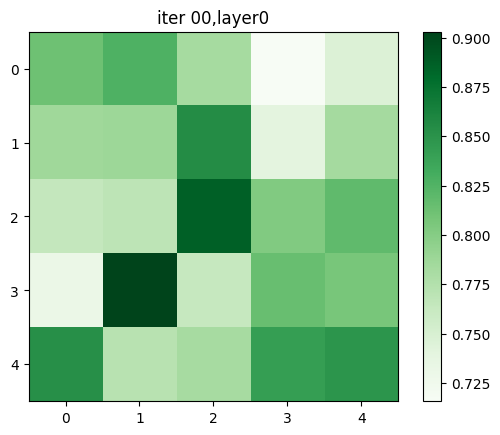

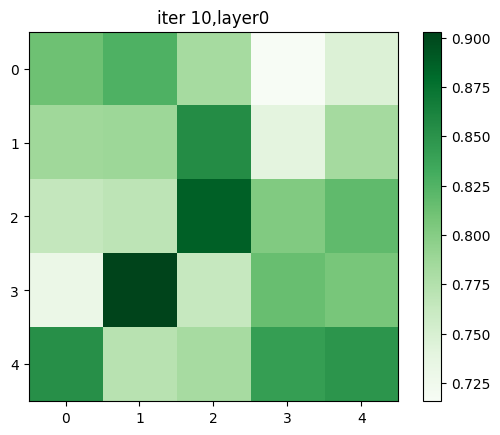

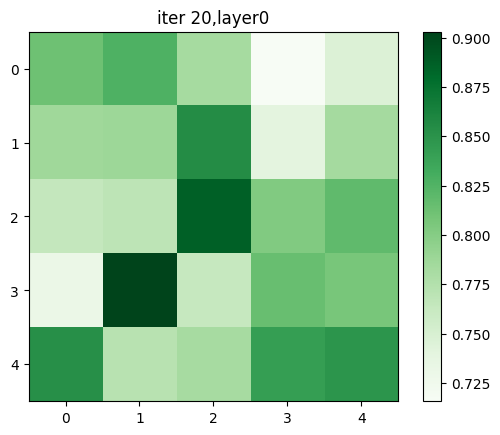

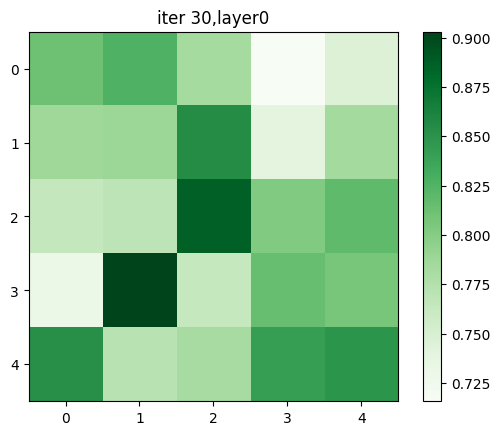

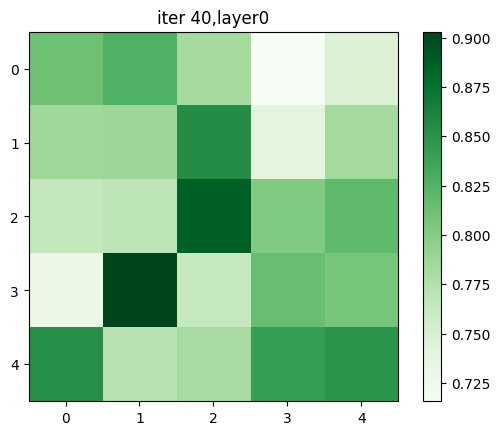

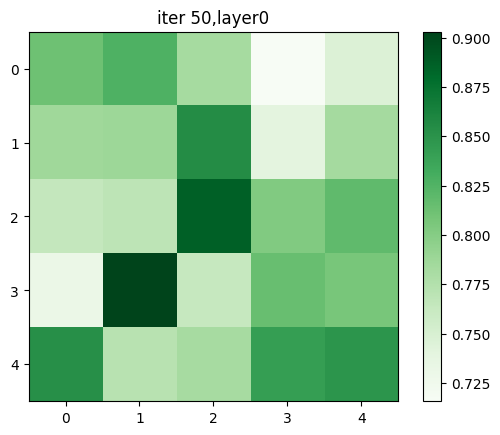

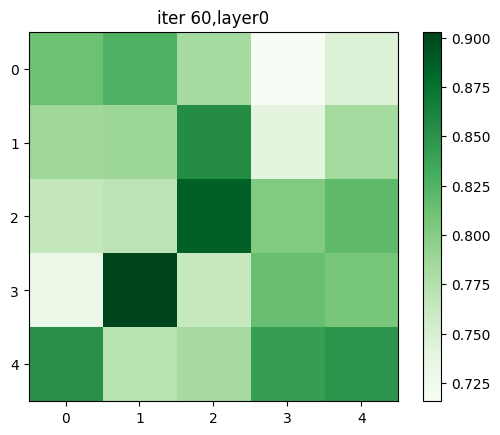

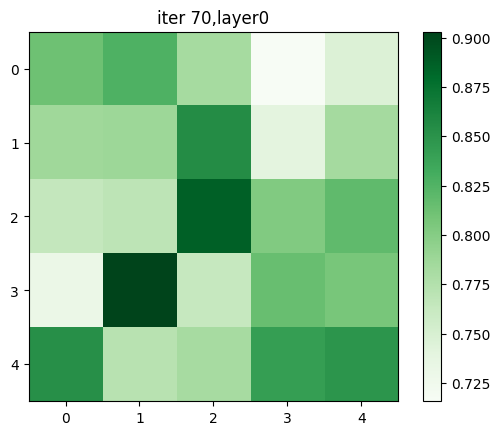

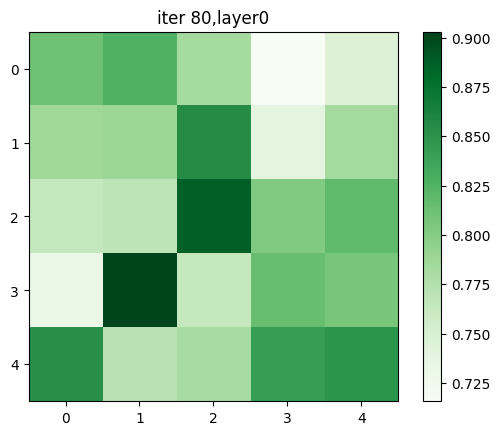

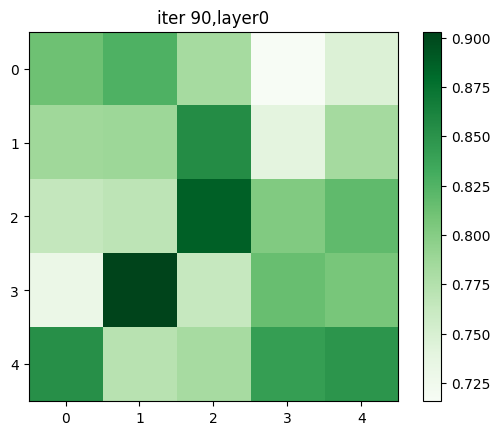

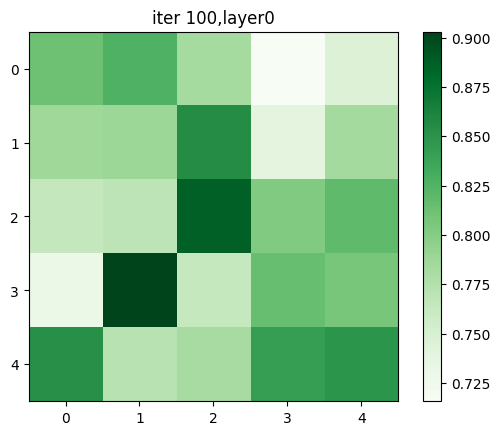

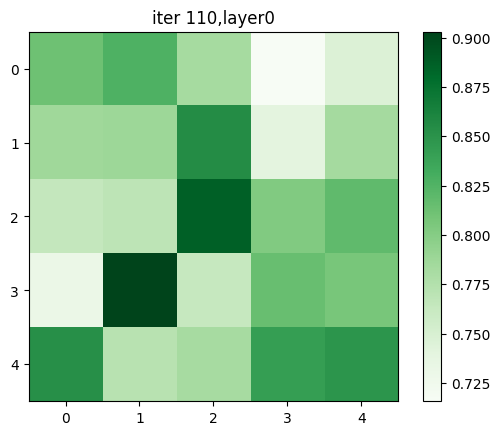

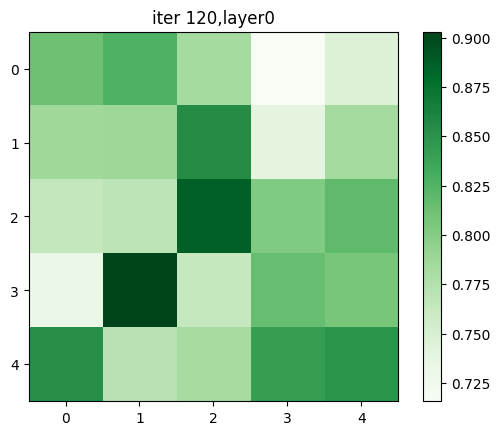

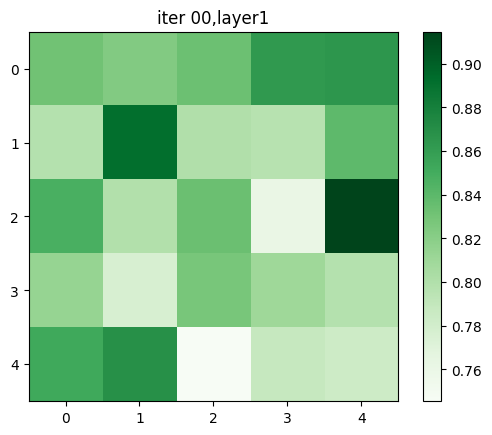

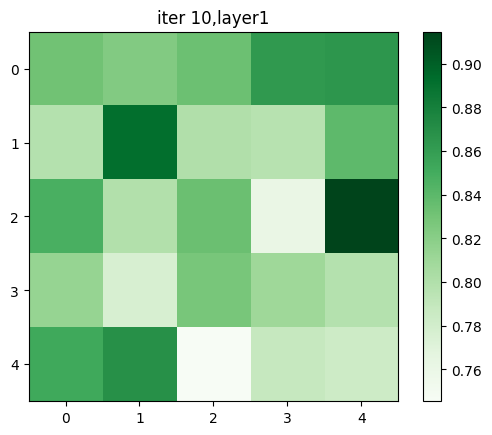

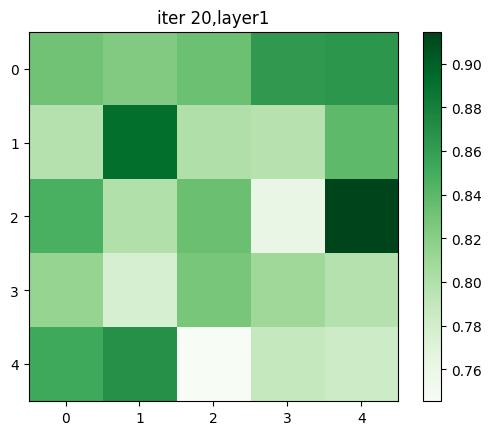

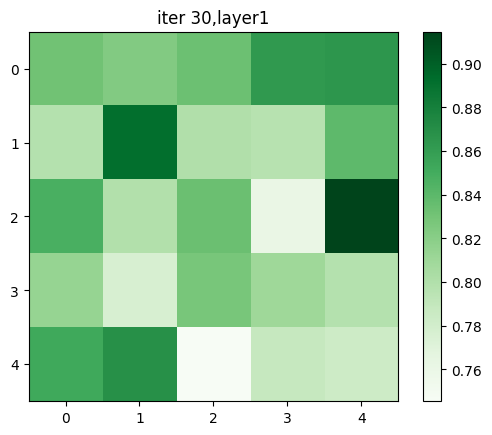

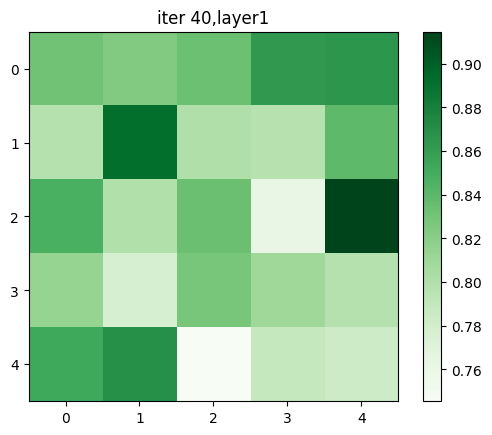

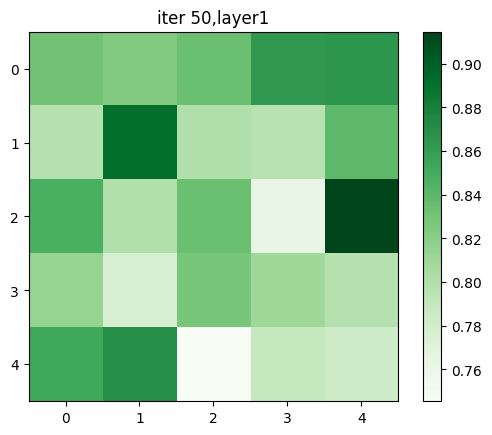

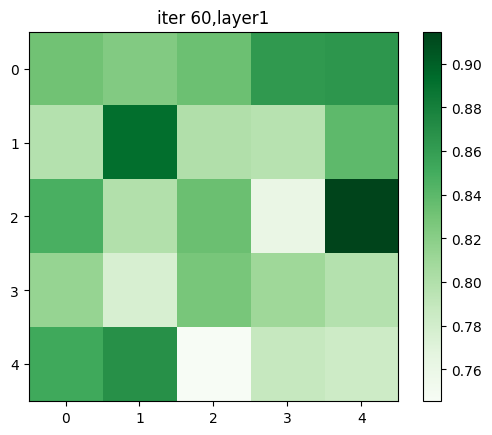

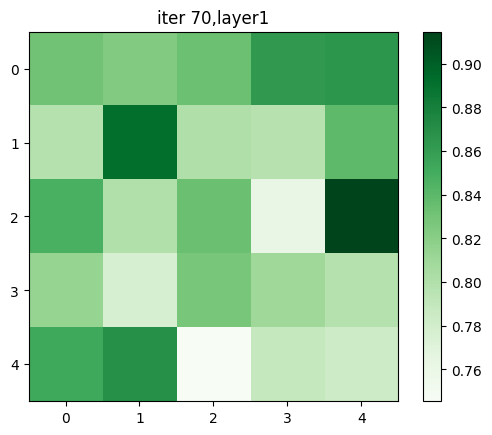

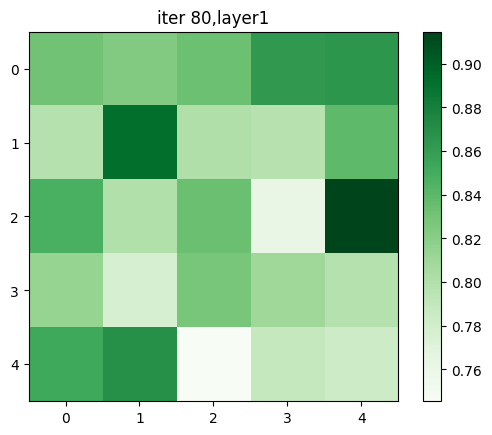

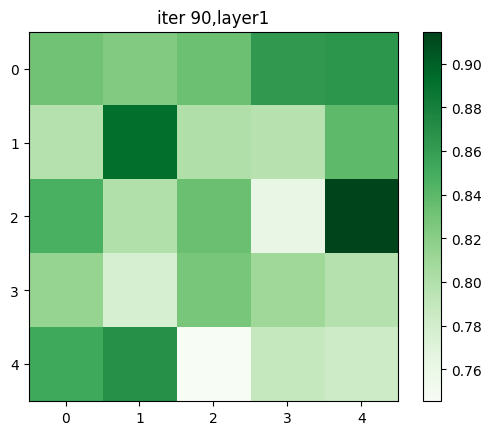

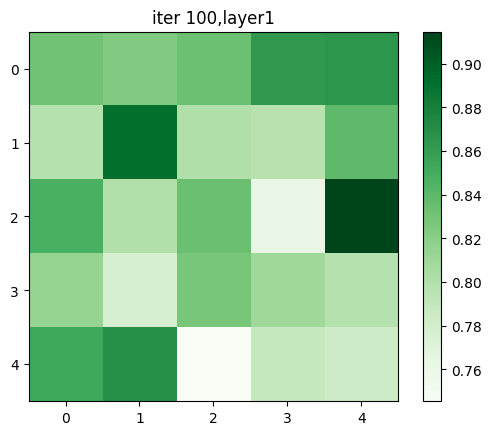

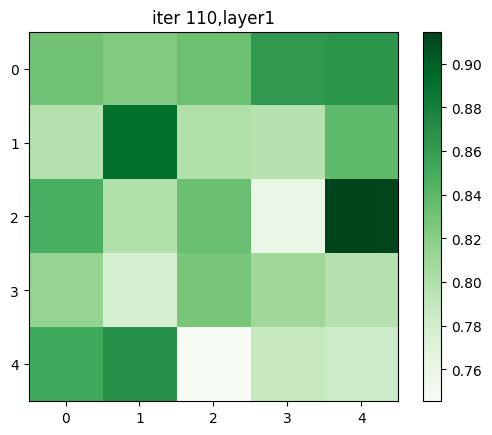

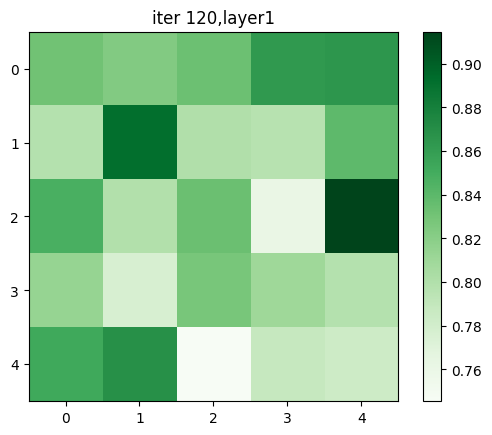

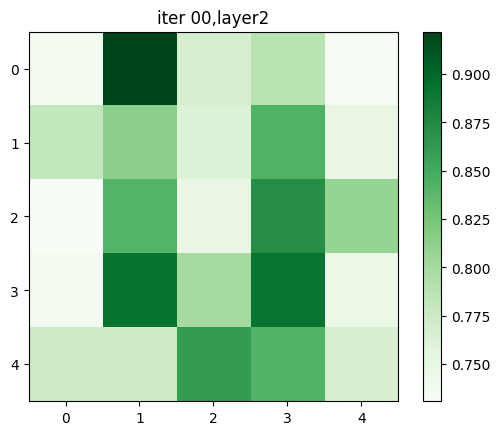

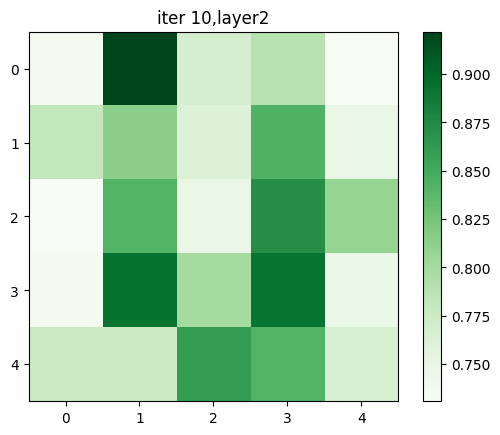

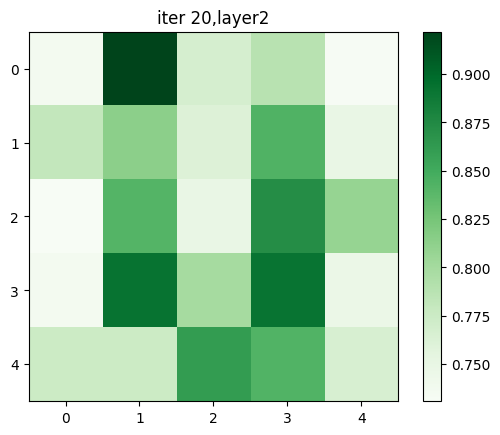

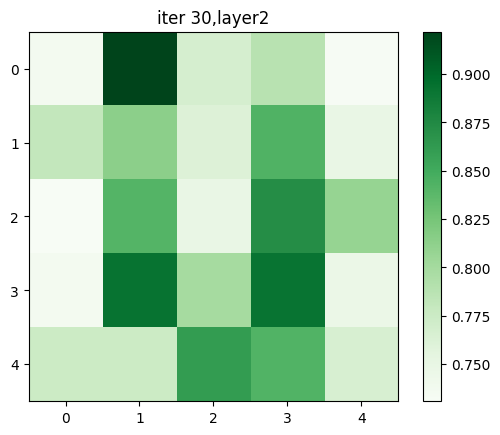

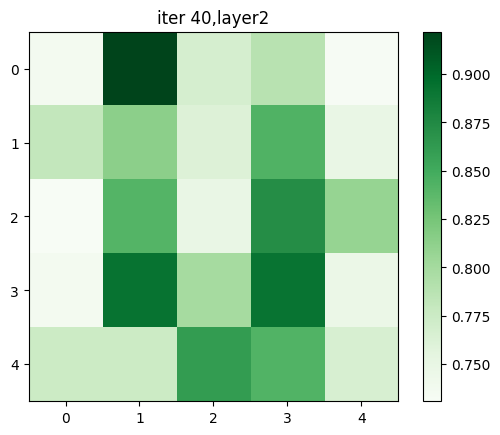

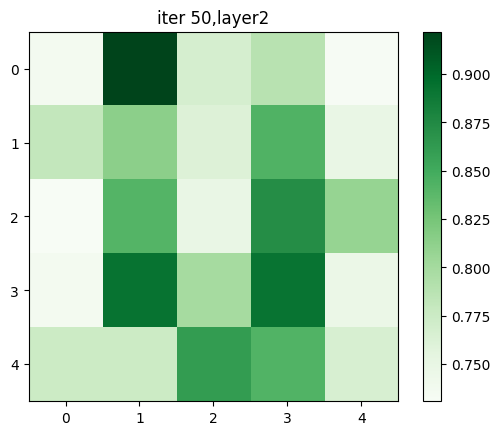

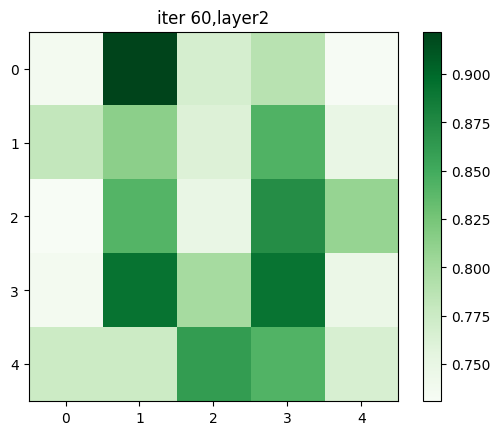

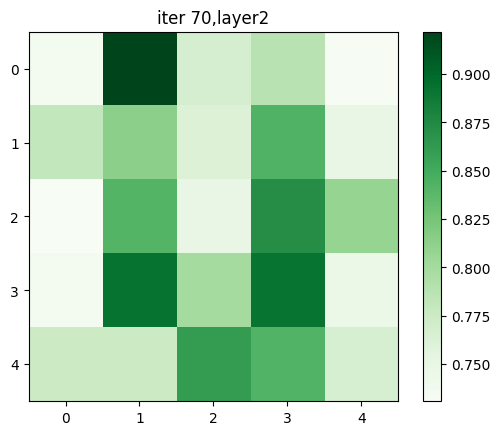

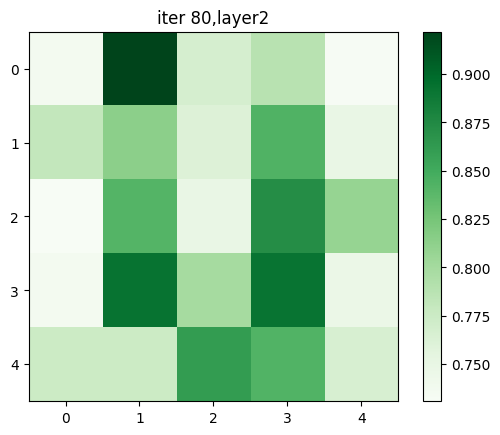

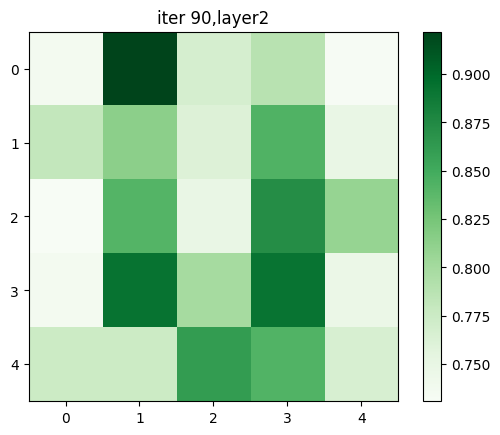

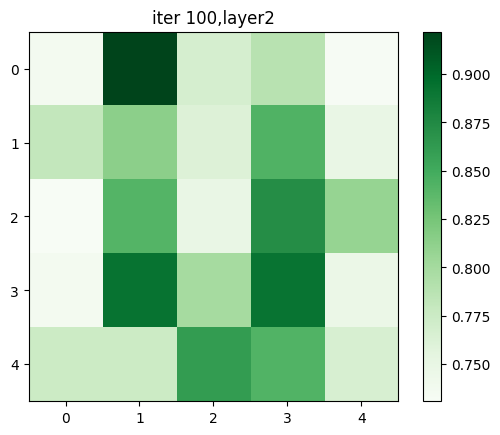

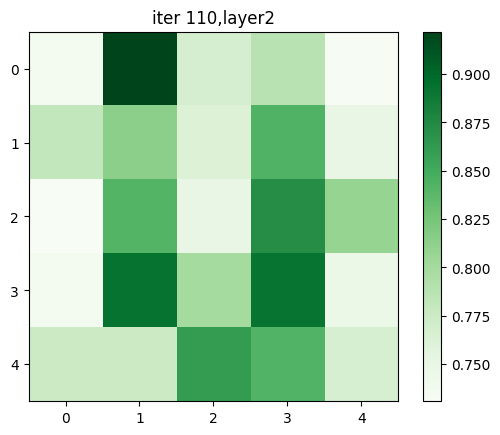

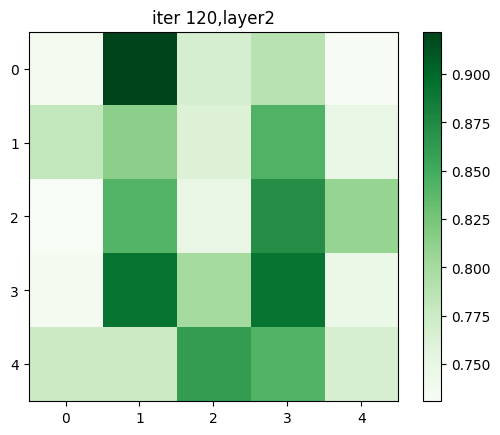

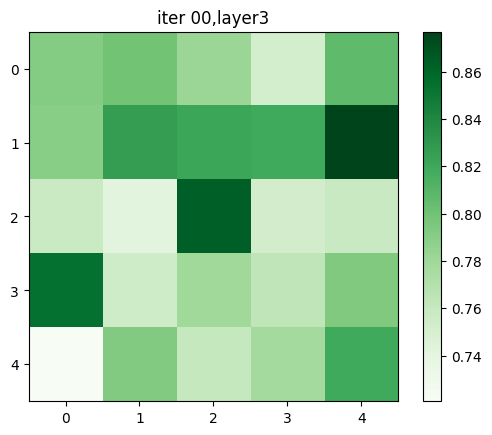

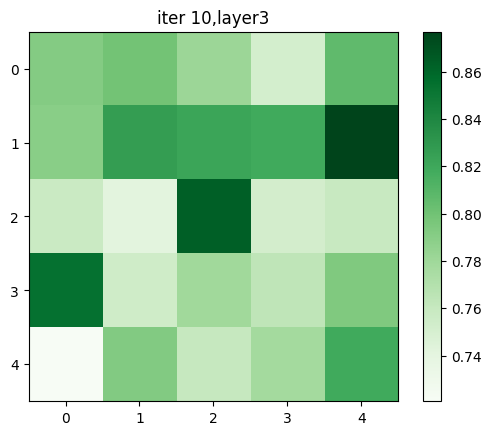

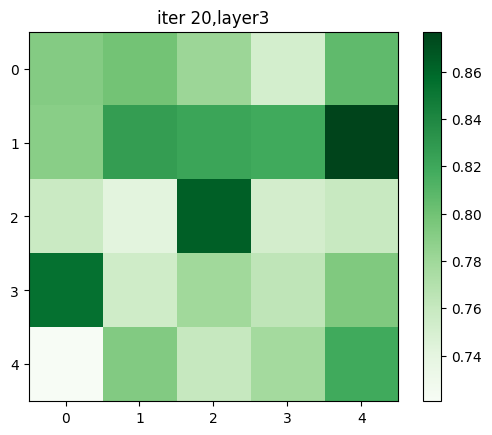

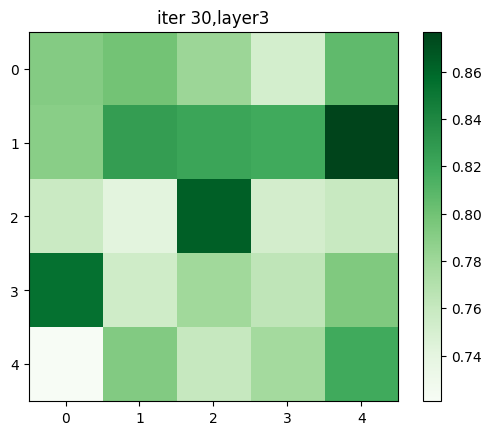

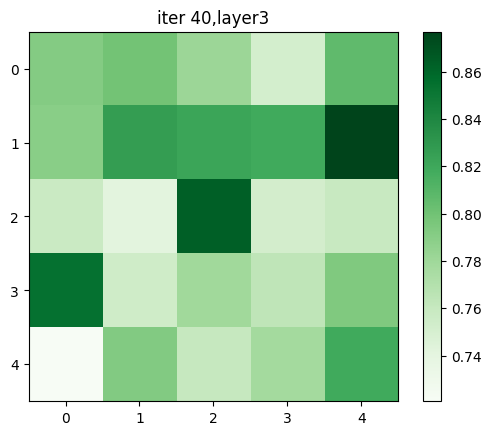

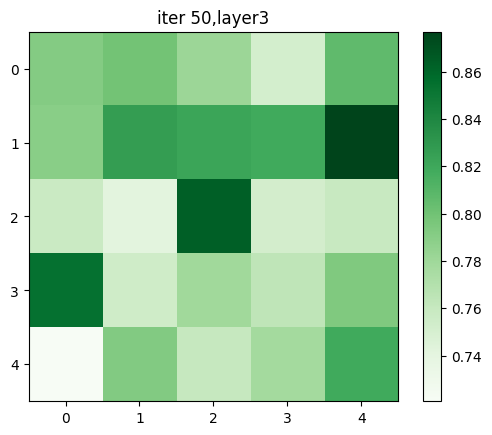

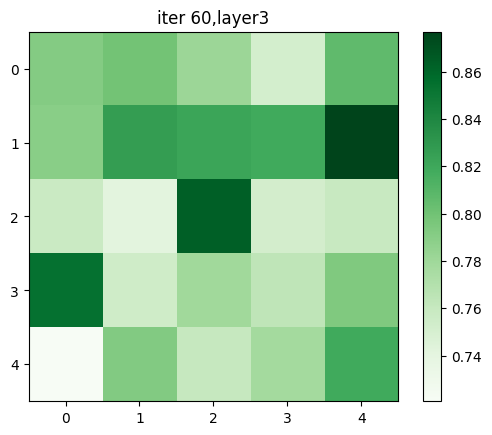

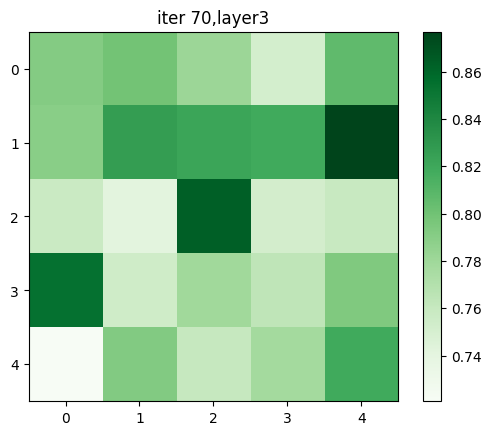

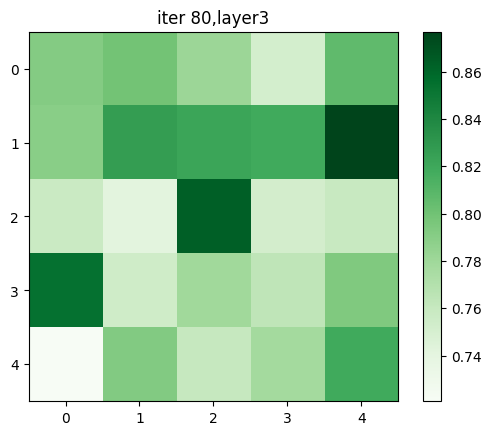

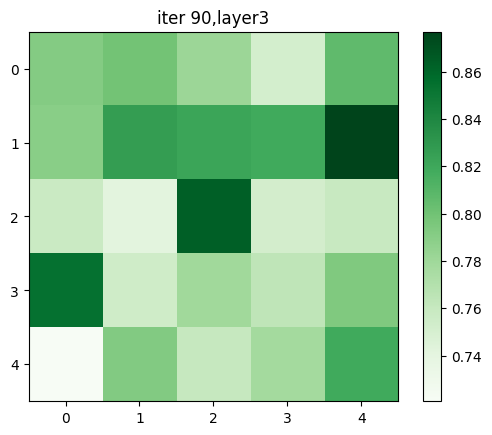

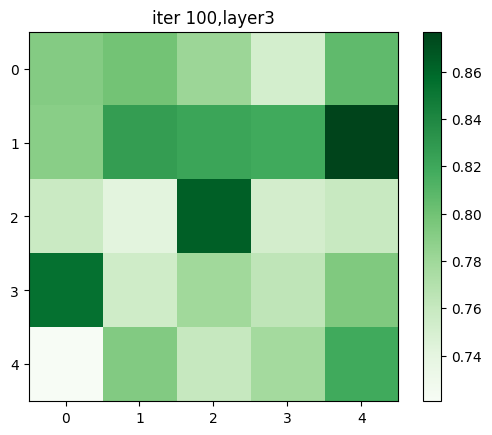

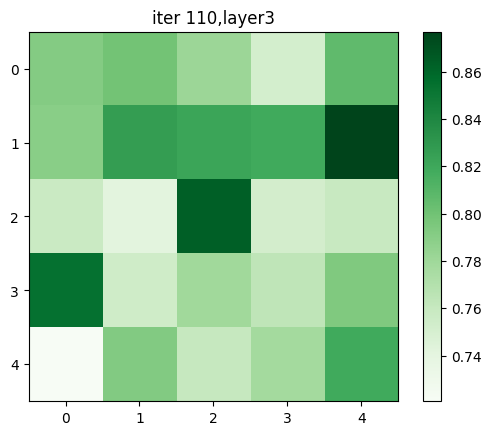

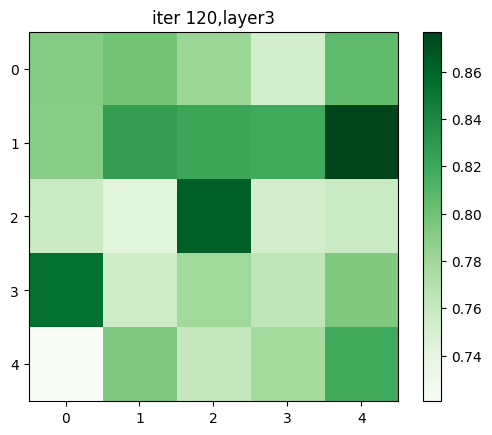

In [12]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(data.shape[1]):
    for j in range(data.shape[0]):
        plt.title("iter {}0,layer{}".format(j,i))
        plt.imshow(data[j,i,0], cmap='Greens', interpolation='nearest')
        plt.colorbar()  # 添加颜色条
        plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
data1 = np.load('D:/Asu/STAM/Norse/w1_1_4.npy')
data2 = np.load('D:/Asu/STAM/Norse/w1_2_1.npy')
data3 = np.load('D:/Asu/STAM/Norse/w1_3_3.npy')
data4 = np.load('D:/Asu/STAM/Norse/w1_4_5.npy')

x1 = [i for i in range(data1.shape[0])] 
x2 = [i for i in range(data2.shape[0])] 
x3 = [i for i in range(data3.shape[0])] 
x4 = [i for i in range(data4.shape[0])]
plt.plot(x1, data1)
plt.plot(x2, data2)
plt.plot(x3, data3)
plt.plot(x4, data4) 

plt.show()


In [ ]:
import torchvision
dataset = torchvision.datasets.Caltech101(
            root="E:/ASU/Norse",
            download=False,
            transform=torchvision.transforms.Compose(
                [
                    torchvision.transforms.PILToTensor(),
                    torchvision.transforms.Resize((240,160)),
                    torchvision.transforms.Grayscale(1)                    
                ]
            ),
        )




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data1 = np.load("E:/ASU/Norse/DoG filter1.npy")
data2 = np.load("E:/ASU/Norse/DoG filter2.npy")
data3 = np.load("E:/ASU/Norse/DoG filter3.npy")
plt.imshow(data1)
plt.show()
plt.imshow(data2)
plt.show()
plt.imshow(data3)
plt.show()